## Latar belakang (Konteks Kasus)
Sebuah perusahaan bergerak di bidang ritel yang beroperasi secara nasional di Amerika, perusahaan ini menyediakan beragam produk seperti peralatan kantor furniture dan produk teknologi. Dengan meningkatnya permintaan dan persaingan yang ketat di pasaran, perusahaan ingin mengetahui dan memahami  apa yang terbaik bagi perusahaan. Perusahaan ingin mengetahui produk, wilayah, kategori, dan segmen pelanggan mana yang tepat untuk di targetkan. Dataset yang tersedia mencakup informasi penting seperti identitas pelanggan, detail produk, tanggal transaksi, dan hasil penjualan, dimana semua ini memungkinkan perusahaan untuk mengevaluasi performa saat ini dan mengidentifikasi area potensial untuk pertumbuhan dan peningkatan dalam layanan mereka.

## Bisnis problem
Untuk meningkatkan profitabilitas dan efisiensi operasional, perusahaan perlu memahami faktor-faktor apa saja yang mempengaruhi kinerja penjualan mereka. Beberapa masalah khusus yang bisa diidentifikasi melalui analisis dataset antara lain:
1. Identifikasi produk atau kategori produk yang kurang perform atau merugi.
2. Analisis pengaruh diskon terhadap penjualan dan profit.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('sample_superstore_clean.csv')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2018-152156,2018-11-08,2018-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2018-152156,2018-11-08,2018-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2018-138688,2018-06-12,2018-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2017-108966,2017-10-11,2017-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2017-108966,2017-10-11,2017-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


### 1. top 10 Product yang paling banyak dan paling sedikit di beli oleh customer

In [45]:
ProductBuy = df.groupby('Product Name')[['Quantity']].sum()
TopProductBuy = ProductBuy.sort_values('Quantity',ascending=False).reset_index().head(10)
LowProductBuy = ProductBuy.sort_values('Quantity',ascending=True).reset_index().head(10)

In [49]:
TopProductBuy = TopProductBuy.sort_values('Quantity')
TopProductBuy

,Product Name,Quantity
9,Staple-based wall hangings,62
8,"Situations Contoured Folding Chairs, 4/Set",64
7,GBC Premium Transparent Covers with Diagonal L...,67
5,Storex Dura Pro Binders,71
6,Avery Non-Stick Binders,71
4,KI Adjustable-Height Table,74
3,Staples in misc. colors,86
2,Easy-staple paper,150
1,Staple envelope,170
0,Staples,215


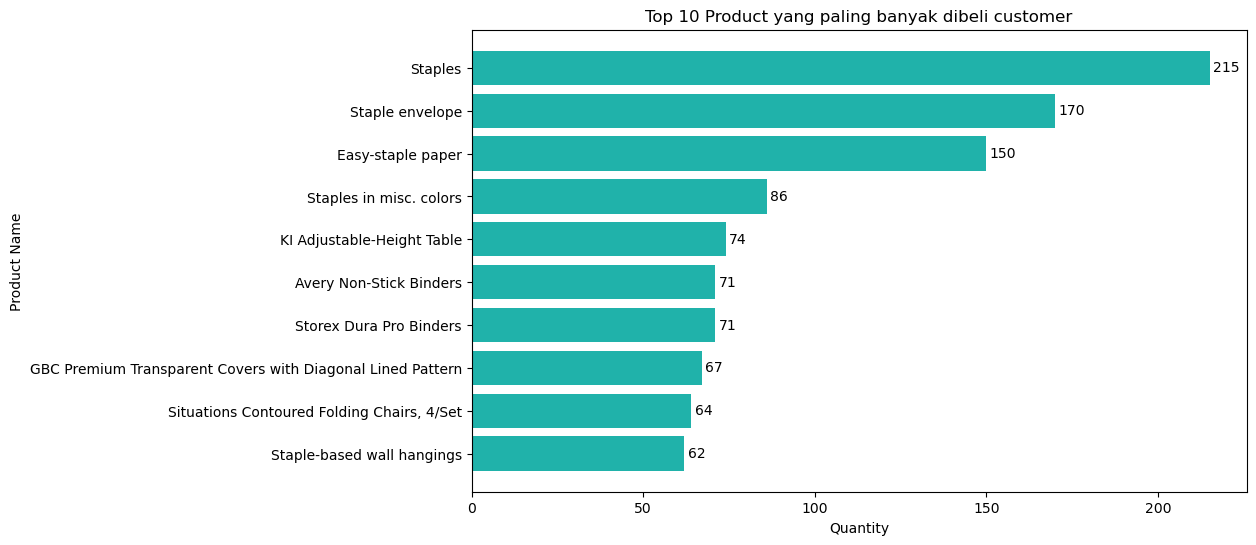

In [50]:
plt.figure(figsize=(10,6))
plt.title('Top 10 Product yang paling banyak dibeli customer')
plt.barh(TopProductBuy['Product Name'],TopProductBuy['Quantity'], color='lightseagreen')
plt.xlabel('Quantity')
plt.ylabel('Product Name')
for index, value in enumerate(TopProductBuy['Quantity']):
    plt.text(value + 1, index, str(value), va='center')
plt.show()

### 2. top 10 Product apa yang paling sedikit di beli oleh customer?

In [52]:
LowProductBuy = LowProductBuy.sort_values('Quantity',ascending=False)
LowProductBuy

,Product Name,Quantity
5,Xerox 1989,2
6,Ultra Commercial Grade Dual Valve Door Closer,2
7,NeatDesk Desktop Scanner & Digital Filing System,2
8,Multimedia Mailers,2
9,Grip Seal Envelopes,2
0,Penpower WorldCard Pro Card Scanner,1
1,Xerox 20,1
2,Boston 1900 Electric Pencil Sharpener,1
3,"Bush Saratoga Collection 5-Shelf Bookcase, Han...",1
4,Global Enterprise Series Seating Low-Back Swiv...,1


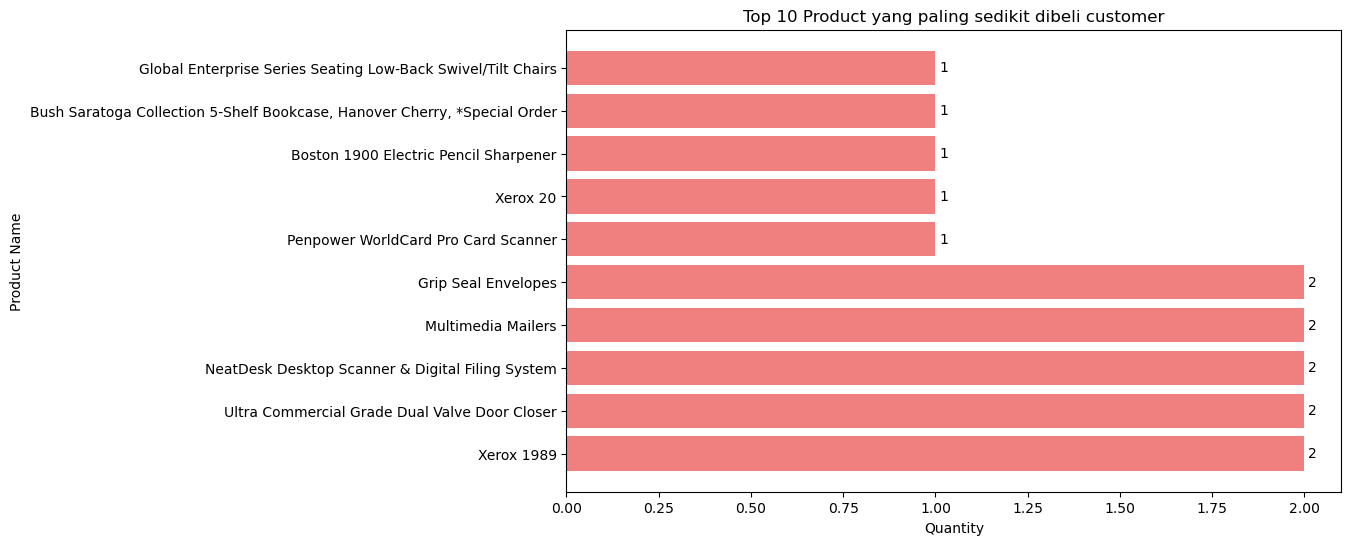

In [53]:
plt.figure(figsize=(10,6))
plt.title('Top 10 Product yang paling sedikit dibeli customer')
plt.barh(LowProductBuy['Product Name'],LowProductBuy['Quantity'], color='lightcoral')
plt.xlabel('Quantity')
plt.ylabel('Product Name')
for index, value in enumerate(LowProductBuy['Quantity']):
    plt.text(value + 0.01, index, str(value), va='center')
plt.show()

Dari kedua grafik diatas (poin 1 dan 2) dapat kita ketahui Top 10 product-product apa saja yang paling banyak dibeli dan paling sedikit dibeli oleh customer. 
- Product yang menempati urutan pertama sebagai product yang paling sering dibeli oleh customer adalah Staples dengan jumlah pembelian sebanyak 215 buah. Jika dilihat lagi untuk product-product yang paling banyak dibeli adalah product untuk perkantoran.
- Sedangkan untuk product yang menempati urutan pertama sebagai product yang paling sedikit dibeli oleh pelanggan adalah Xerox 20 dengan jumlah pembelian sebanyak 1 buah. jika dilihat lagi untuk product-product yang paling sedikit dibeli memiliki cukup banyak ragamnya mulai dari product perkantoran, elektronik dan juga furniture. sehingga kategorinya tidak terlalu spesifik seperti product yang paling banyak dibeli. 

### 3. kategori apa yang memberikan profit tertinggi dan terendah?

In [8]:
Category_Profit = df.groupby('Category')[['Profit']].median().sort_values('Profit',ascending=False).reset_index()
Category_Profit

,Category,Profit
0,Technology,24.9360
1,Furniture,7.7728
2,Office Supplies,6.8824


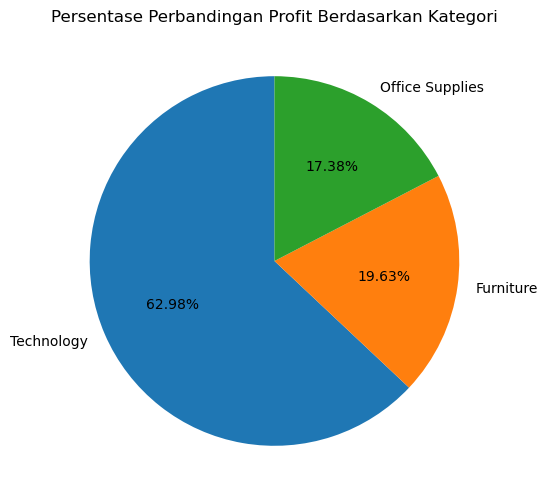

In [41]:
plt.figure(figsize=(10,6))
plt.pie(Category_Profit['Profit'], labels=Category_Profit['Category'],autopct='%1.2f%%',
        startangle=90)
plt.title('Persentase Perbandingan Profit Berdasarkan Kategori')
plt.show()

Berdasarkan pie chart diatas, bisa kita lihat presentase Profit yang di dapat dari tiap Category. Category yang memberikan profit paling besar pada superstore adalah Category Technology dengan presentase 62.98%, sedangkan Category yang memberikan profit paling kecil pada superstore adalah Office Supplies dengan presentase 17.38%. Perbedaannya cukup jauh dengan category Technology, namun tidak terlalu jauh jika dibandingkan dengan category Furniture yang menempati tempat kedua sebagai Category dengan profit terbesar dengan presentase 19.63%.

### 4. segment apa yang memiliki tingkat penjualan tertinggi dan terendah?

In [10]:
Segment_Sales = df.groupby('Segment')[['Sales']].median().sort_values('Sales',ascending=False).reset_index()
Segment_Sales

,Segment,Sales
0,Corporate,56.45
1,Consumer,53.71
2,Home Office,52.39


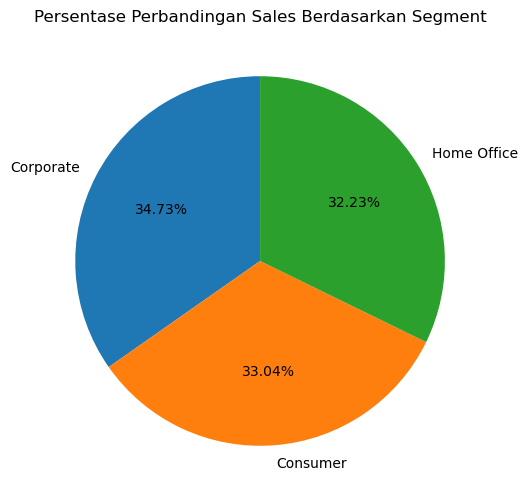

In [57]:
plt.figure(figsize=(10,6))
plt.pie(Segment_Sales['Sales'], labels=Segment_Sales['Segment'],autopct='%1.2f%%',
        startangle=90)
plt.title('Persentase Perbandingan Sales Berdasarkan Segment')
plt.show()

Berdasarkan pie chart diatas, bisa kita lihat presentase Penjualan yang di dapat dari tiap Segment agar bisa menargetkan atau menawarkan produk yang sesuai pada setiap segment, selain itu kita juga bisa mengidentifikasi peluang pasar untuk produk baru.

Jika dilihat secara keseluruhan untuk tiap segment tidak memiliki selisih yang besar dan bisa dibilang hampir sama rata untuk tiap segment. Namun tiap segment memiliki presentase berbeda, untuk segment dengan presentase penjualan paling besar adalah Corporate dengan presentase 34.73%, sedangkan untuk segment dengan presentase penjualan paling kecil adalah Home Office dengan presentase 32.23%.

### 5. top 10 wilayah apa yang memberikan profit paling tinggi?

In [12]:
StateProfit = df.groupby('State')[['Profit']].sum().round(0)
StateTopProfit = StateProfit.sort_values('Profit',ascending=False).reset_index().head(10)
StateLowProfit = StateProfit.sort_values('Profit',ascending=True).reset_index().head(10)

In [55]:
StateTopProfit = StateTopProfit.sort_values('Profit')
StateTopProfit

,State,Profit
9,Delaware,9977.0
8,Minnesota,10823.0
7,Kentucky,11200.0
6,Georgia,16250.0
5,Indiana,18383.0
4,Virginia,18598.0
3,Michigan,24463.0
2,Washington,33403.0
1,New York,74039.0
0,California,76381.0


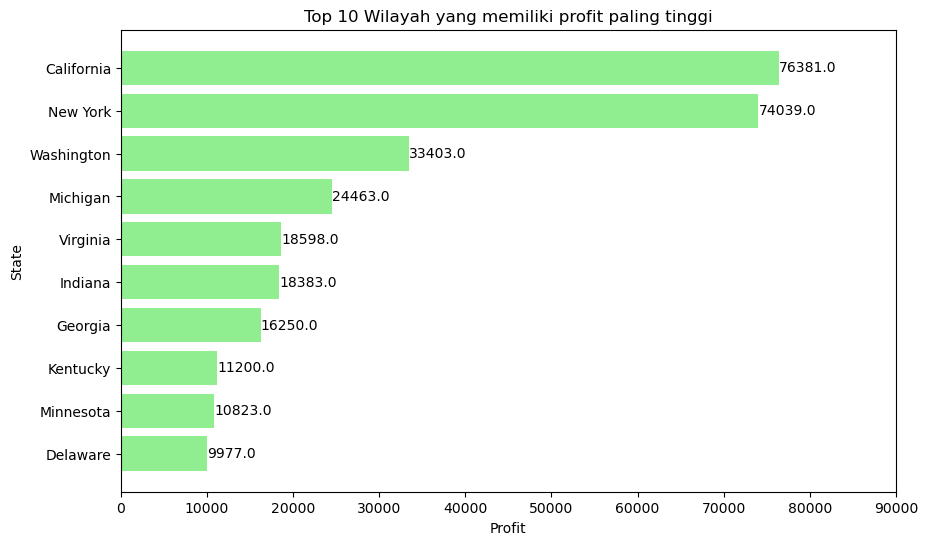

In [56]:
plt.figure(figsize=(10,6))
plt.title('Top 10 Wilayah yang memiliki profit paling tinggi')
plt.barh(StateTopProfit['State'],StateTopProfit['Profit'],color='lightgreen')
plt.ylabel('State')
plt.xlabel('Profit')
plt.xlim(0,90000)
plt.xticks(rotation=0)
for index, value in enumerate(StateTopProfit['Profit']):
    plt.text(value + 1, index, str(value), va='center')
plt.show()
plt.show()

### 6. top 10 wilayah apa yang memberikan profit paling rendah?

In [15]:
StateLowProfit

,State,Profit
0,Texas,-25729.0
1,Ohio,-16971.0
2,Pennsylvania,-15560.0
3,Illinois,-12608.0
4,North Carolina,-7491.0
5,Colorado,-6528.0
6,Tennessee,-5342.0
7,Arizona,-3428.0
8,Florida,-3399.0
9,Oregon,-1190.0


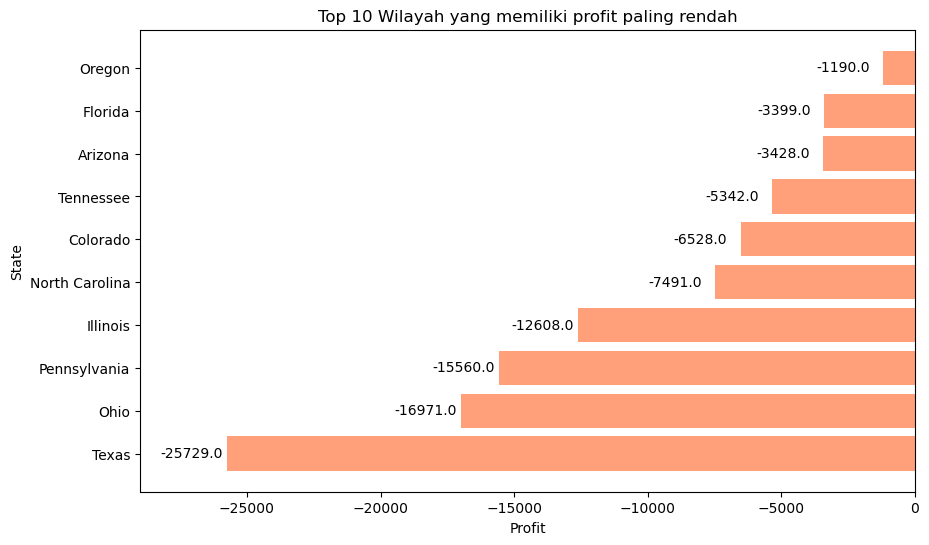

In [16]:
plt.figure(figsize=(10,6))
plt.title('Top 10 Wilayah yang memiliki profit paling rendah')
plt.barh(StateLowProfit['State'],StateLowProfit['Profit'],color='lightsalmon')
plt.ylabel('State')
plt.xlabel('Profit')
plt.xlim(-29000, 0)
for index, value in enumerate(StateLowProfit['Profit']):
    plt.text(value + -2500, index, str(value), va='center')
plt.show()

Dari kedua grafik diatas dapat kita ketahui Top 10 wilayah dengan profit paling tinggi dan juga paling rendah. Wilayah yang menempati urutan pertama sebagai wilayah yang memiliki profit paling tinggi adalah California, sedangkan untuk Wilayah yang menempati urutan pertama sebagai wilayah yang memiliki profit paling rendah adalah Texas.

- Pada top wilayah dengan profit paling tinggi, selisih dari wilayah dengan urutan pertama dan terakhir cukup jauh. pada wilayah dengan urutan pertama yaitu California, wilayah tersebut memiliki profit sebanyak 76381.0. Sedangkan untuk wilayah dengan urutan terakhir yaitu Delaware memiliki profit sebanyak 9977.0.

- Pada top wilayah dengan profit paling rendah, selisih dari wilayah dengan urutan pertama dan terakhir juga cukup jauh. pada wilayah dengan urutan pertama yaitu Texas dengan nilai profit -25729.0. Sedangkan untuk wilayah dengan urutan terakhir yaitu Oregon memiliki profit sebanyak 1190.0

### 7. metode pengiriman apa yang paling banyak di gunakan?

In [17]:
ship_mode = pd.crosstab(index=df['Ship Mode'], columns='Jumlah')
ship_mode

col_0,Jumlah
Ship Mode,
First Class,1538
Same Day,543
Second Class,1944
Standard Class,5958


In [18]:
ship_mode_counts = ship_mode['Jumlah']

fig = px.pie(values=ship_mode_counts.values, names=ship_mode.index, width=900, height=500,
             color_discrete_sequence=px.colors.sequential.Emrld)
fig.update_layout(title_text='Persentase Penggunaan Metode Pengiriman', title_x=0.5,
                  legend=dict(
                      yanchor="top",
                      y=0.99,
                      xanchor="right",
                      x=0.99
                  ))

- Standard Class : 5958 (59.7%)
- Second Class : 1944 (19.5%)
- First Class : 1538 (15.4%)
- Same Day : 543 (5.44%)

Dari visualisasi di atas, dapat disimpulkan bahwa metode pengiriman Standard Class adalah metode yang paling banyak digunakan, dengan persentase 59.7%. Sementara itu, metode pengiriman Same Day memiliki persentase penggunaan paling rendah, yaitu 5.44%.

Penggunaan metode pengiriman Standard Class yang tinggi dapat disebabkan oleh beberapa faktor:
1. Biaya yang lebih murah: Standard Class menawarkan tarif pengiriman yang lebih ekonomis dibandingkan metode pengiriman yang lebih cepat seperti Same Day atau First Class. Sebagian besar konsumen cenderung memilih opsi pengiriman yang lebih terjangkau untuk menghemat biaya.
2. Kebutuhan urgensi yang rendah: Banyak pelanggan mungkin tidak membutuhkan barang yang dikirim dengan cepat, sehingga mereka memilih pengiriman dengan biaya yang lebih rendah meskipun waktu pengirimannya lebih lama.

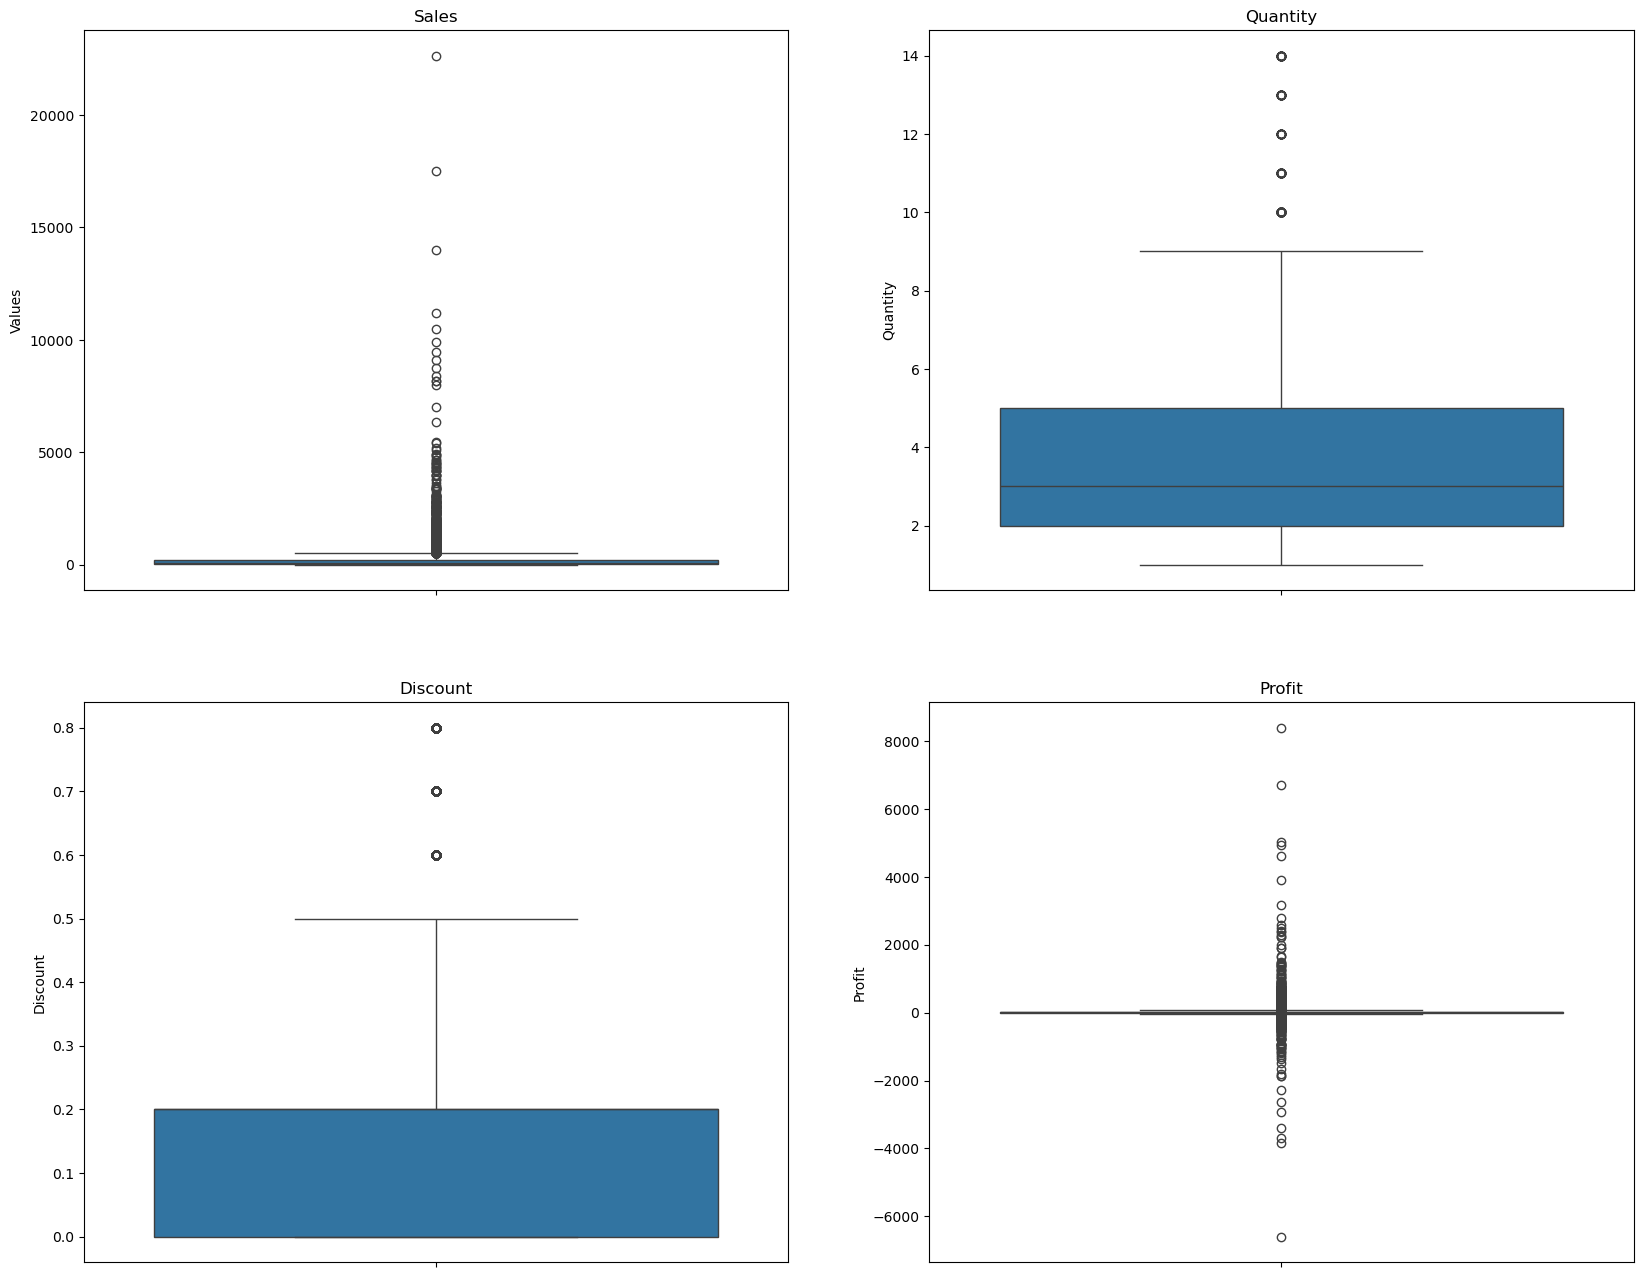

In [19]:
num_cols = [
    'Sales', 'Quantity', 'Discount', 'Profit'
]

fig, axs = plt.subplots(2, 2,  figsize=(20,16))
axs = axs.flatten()
for i, data in enumerate(num_cols):
    if i % 5 == 0:
        axs[i].set_ylabel('Values')
    sns.boxplot( data=df[data], ax=axs[i])
    axs[i].set_title(data)

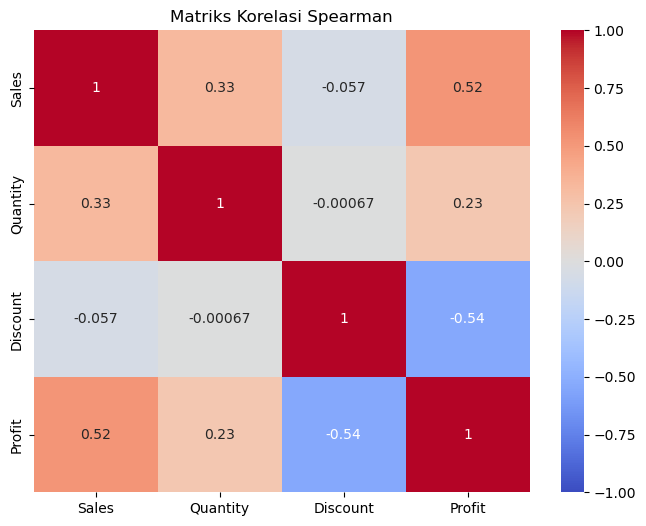

In [20]:
correlation_matrix = df[num_cols].corr(method='spearman')

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriks Korelasi Spearman')
plt.show()


### 8. Bagaimana pengaruh Discount terhadap penjualan product?

- Korelasi antara Discount dan Sales sebesar -0.057, yang menunjukkan korelasi negatif yang sangat lemah.
- Hal ini berarti bahwa secara statistik, Discount tidak memiliki hubungan yang signifikan dengan Sales. Penurunan atau kenaikan Discount tidak secara jelas mempengaruhi jumlah penjualan produk.
- Kesimpulannya, pemberian diskon mungkin tidak selalu efektif dalam meningkatkan penjualan secara signifikan, dan perlu dipertimbangkan faktor lain yang lebih memengaruhi konsumen untuk membeli


### 9. Bagaimana pengaruh discount terhadap profit? (explanatory)

- Korelasi antara Discount dan Profit sebesar -0.54, yang menunjukkan korelasi negatif sedang.
- Ini berarti bahwa ada hubungan negatif yang cukup signifikan antara Discount dan Profit. Semakin tinggi Discount yang diberikan, semakin rendah Profit yang diperoleh. Hal ini dapat disebabkan oleh penurunan margin keuntungan karena harga jual yang lebih rendah saat diskon diberikan.
- Secara logis, meskipun diskon dapat meningkatkan jumlah pembelian atau menarik lebih banyak konsumen, terlalu banyak diskon dapat mengurangi Profit perusahaan. Oleh karena itu, perusahaan perlu mengatur strategi diskon secara hati-hati untuk memastikan bahwa peningkatan volume penjualan tidak mengorbankan keuntungan.


### 10. Bagaimana tren penjualan tiap tahun antar kuartal?

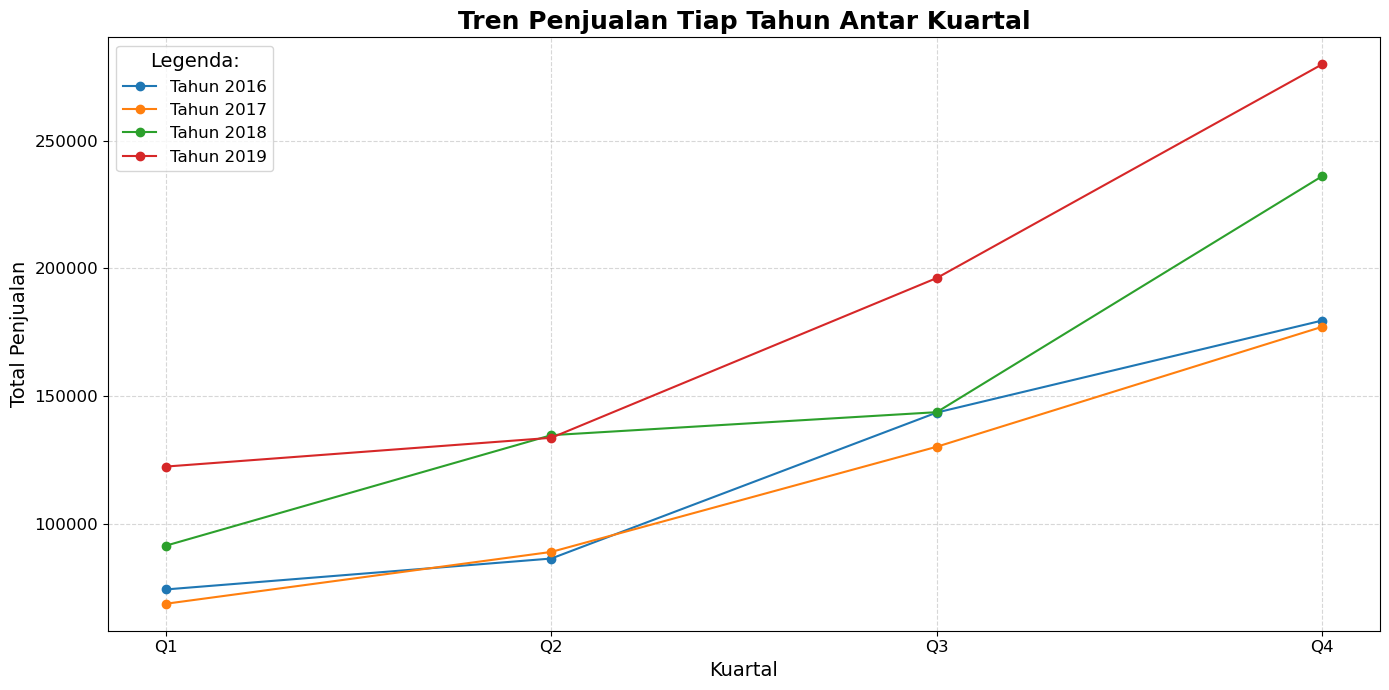

In [21]:
# Mengonversi kolom 'Order Date' ke tipe datetime jika belum
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Menambahkan kolom 'Year' dan 'Quarter'
df['Year'] = df['Order Date'].dt.year
df['Quarter'] = df['Order Date'].dt.quarter

# Mengelompokkan data berdasarkan tahun dan kuartal, lalu menghitung total penjualan
sales_trend = df.groupby(['Year', 'Quarter'])['Sales'].sum().reset_index()

# Membuat visualisasi
plt.figure(figsize=(14, 7))
for year in sales_trend['Year'].unique():
    data_per_year = sales_trend[sales_trend['Year'] == year]
    plt.plot(data_per_year['Quarter'], data_per_year['Sales'], marker='o', label=f'Tahun {year}')

plt.title('Tren Penjualan Tiap Tahun Antar Kuartal', fontsize=18, fontweight='bold')
plt.xlabel('Kuartal', fontsize=14)
plt.ylabel('Total Penjualan', fontsize=14)
plt.xticks([1, 2, 3, 4], labels=['Q1', 'Q2', 'Q3', 'Q4'], fontsize=12)  # Label kuartal lebih deskriptif
plt.yticks(fontsize=12)
plt.legend(title='Legenda:', fontsize=12, title_fontsize=14)
plt.grid(visible=True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

- Peningkatan Penjualan di Setiap Kuartal: Visualisasi menunjukkan tren peningkatan penjualan yang cukup konsisten di setiap kuartal dalam setiap tahun. Terutama pada tahun 2019, terlihat peningkatan signifikan yang lebih curam dibandingkan dengan tahun-tahun sebelumnya, yang menunjukkan lonjakan penjualan yang lebih besar.
- Kuartal 4 Menjadi Kuartal dengan Penjualan Tertinggi: Semua tahun menunjukkan bahwa penjualan mencapai puncaknya pada kuartal ke-4. Ini mengindikasikan bahwa kuartal terakhir dalam tahun tersebut adalah periode yang paling produktif untuk penjualan. Kuartal ke-4 biasanya bertepatan dengan musim liburan, seperti Natal dan akhir tahun, di mana konsumen cenderung berbelanja lebih banyak. [Menurut National Retail Federation (NRF)](https://nrf.com/media-center/press-releases/2024-holiday-spending-expected-reach-new-record), penjualan ritel cenderung meningkat drastis selama musim liburan.
- Pertumbuhan Tahunan Berbeda: Tahun 2019 mencatat pertumbuhan penjualan tertinggi secara keseluruhan, diikuti oleh 2018. Tahun 2016 dan 2017 menunjukkan pertumbuhan yang lebih lambat.

## Kesimpulan
1. produk yang paling banyak dibeli merupakan produk dengan kategori Office Supplies. Product yang paling sedikit dibeli memiliki cukup banyak ragamnya mulai dari product perkantoran, elektronik dan juga furniture. sehingga kategorinya tidak terlalu spesifik
2. Category yang memberikan profit paling besar pada superstore adalah Category Technology dengan presentase 62.98%, sedangkan Category yang memberikan profit paling kecil pada superstore adalah Office Supplies dengan presentase 17.38%. Perbedaannya cukup jauh dengan category Technology, namun tidak terlalu jauh jika dibandingkan dengan category Furniture yang menempati tempat kedua sebagai Category dengan profit terbesar dengan presentase 19.63%.
3. secara keseluruhan untuk tiap segment tidak memiliki selisih yang besar dan bisa dibilang hampir sama rata untuk tiap segment. Namun tiap segment memiliki presentase berbeda, untuk segment dengan presentase penjualan paling besar adalah Corporate dengan presentase 34.73%, sedangkan untuk segment dengan presentase penjualan paling kecil adalah Home Office dengan presentase 32.23%.
4. Wilayah yang menempati urutan pertama sebagai wilayah yang memiliki profit paling tinggi adalah California, sedangkan untuk Wilayah yang menempati urutan pertama sebagai wilayah yang memiliki profit paling rendah adalah Texas.
5. metode pengiriman Standard Class adalah metode yang paling banyak digunakan, dengan persentase 59.7%. Sementara itu, metode pengiriman Same Day memiliki persentase penggunaan paling rendah, yaitu 5.44%.
    Penggunaan metode pengiriman Standard Class yang tinggi dapat disebabkan oleh beberapa faktor:
    - Biaya yang lebih murah: Standard Class menawarkan tarif pengiriman yang lebih ekonomis dibandingkan metode pengiriman yang lebih cepat seperti Same Day atau First Class. Sebagian besar konsumen cenderung memilih opsi pengiriman yang lebih terjangkau untuk menghemat biaya.
    - Kebutuhan urgensi yang rendah: Banyak pelanggan mungkin tidak membutuhkan barang yang dikirim dengan cepat, sehingga mereka memilih pengiriman dengan biaya yang lebih rendah meskipun waktu pengirimannya lebih lama.
6. Korelasi antara Discount dan Sales sebesar -0.057, yang menunjukkan korelasi negatif yang sangat lemah. Hal ini berarti bahwa secara statistik, Discount tidak memiliki hubungan yang signifikan dengan Sales. Penurunan atau kenaikan Discount tidak secara jelas mempengaruhi jumlah penjualan produk Kesimpulannya, pemberian diskon mungkin tidak selalu efektif dalam meningkatkan penjualan secara signifikan, dan perlu dipertimbangkan faktor lain yang lebih memengaruhi konsumen untuk membeli
7. Korelasi antara Discount dan Profit sebesar -0.54, yang menunjukkan korelasi negatif sedang. Ini berarti bahwa ada hubungan negatif yang cukup signifikan antara Discount dan Profit. Semakin tinggi Discount yang diberikan, semakin rendah Profit yang diperoleh. Hal ini dapat disebabkan oleh penurunan margin keuntungan karena harga jual yang lebih rendah saat diskon diberikan. Secara logis, meskipun diskon dapat meningkatkan jumlah pembelian atau menarik lebih banyak konsumen, terlalu banyak diskon dapat mengurangi Profit perusahaan. Oleh karena itu, perusahaan perlu mengatur strategi diskon secara hati-hati untuk memastikan bahwa peningkatan volume penjualan tidak mengorbankan keuntungan.
8. Kuartal 4 Menjadi Kuartal dengan Penjualan Tertinggi: Semua tahun menunjukkan bahwa penjualan mencapai puncaknya pada kuartal ke-4. Ini mengindikasikan bahwa kuartal terakhir dalam tahun tersebut adalah periode yang paling produktif untuk penjualan. Kuartal ke-4 biasanya bertepatan dengan musim liburan, seperti Natal dan akhir tahun, di mana konsumen cenderung berbelanja lebih banyak. [Menurut National Retail Federation (NRF)](https://nrf.com/media-center/press-releases/2024-holiday-spending-expected-reach-new-record), penjualan ritel cenderung meningkat drastis selama musim liburan.

## Rekomendasi 
1. untuk produk yang kurang perform, penjualan bisa ditingkatkan dengan melakukan paket bundling dengan produk laris yang memiliki kategori yang sama. misalnya produk yang paling laku dan tidak laku pada kategori office supplies dipasangkan. tetapi produk juga harus memiliki keterkaitan satu sama lain, contohnya grip seals envelope dengan staple envelope. tetapi paket bundling ini hanya cocok dilakukan untuk produk dengan harga yang murah seperti pada produk dengan kategori office supplies
2. untuk produk yang tergolong mahal seperti produk pada kategori furniture dan technology, bisa menggunakan strategi penawaran pembayaran yang flexsibel. contohnya cicilan tanpa bunga dan diskon untuk pembayaran langsung
3. meninjau ulang kembali penerapan discount karena korelasi antara discount dan sales sangat lemah bahkan bisa dikatakan tidak ada korelasi. strategi discount bisa dilakukan dengan menerapkan discount kepada produk yang memiliki margin keuntungan yang tinggi. atau bisa juga dengan memberikan diskon untuk pembelian minimum misalnya pembelian 500000 akan mendapatkan diskon sebesar 10%. strategi ini bisa mendorong pelanggan untuk membeli lebih banyak agar mencapai minimum pembelian. 